In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/niikhill/AI-ML-Class/main/datasets/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


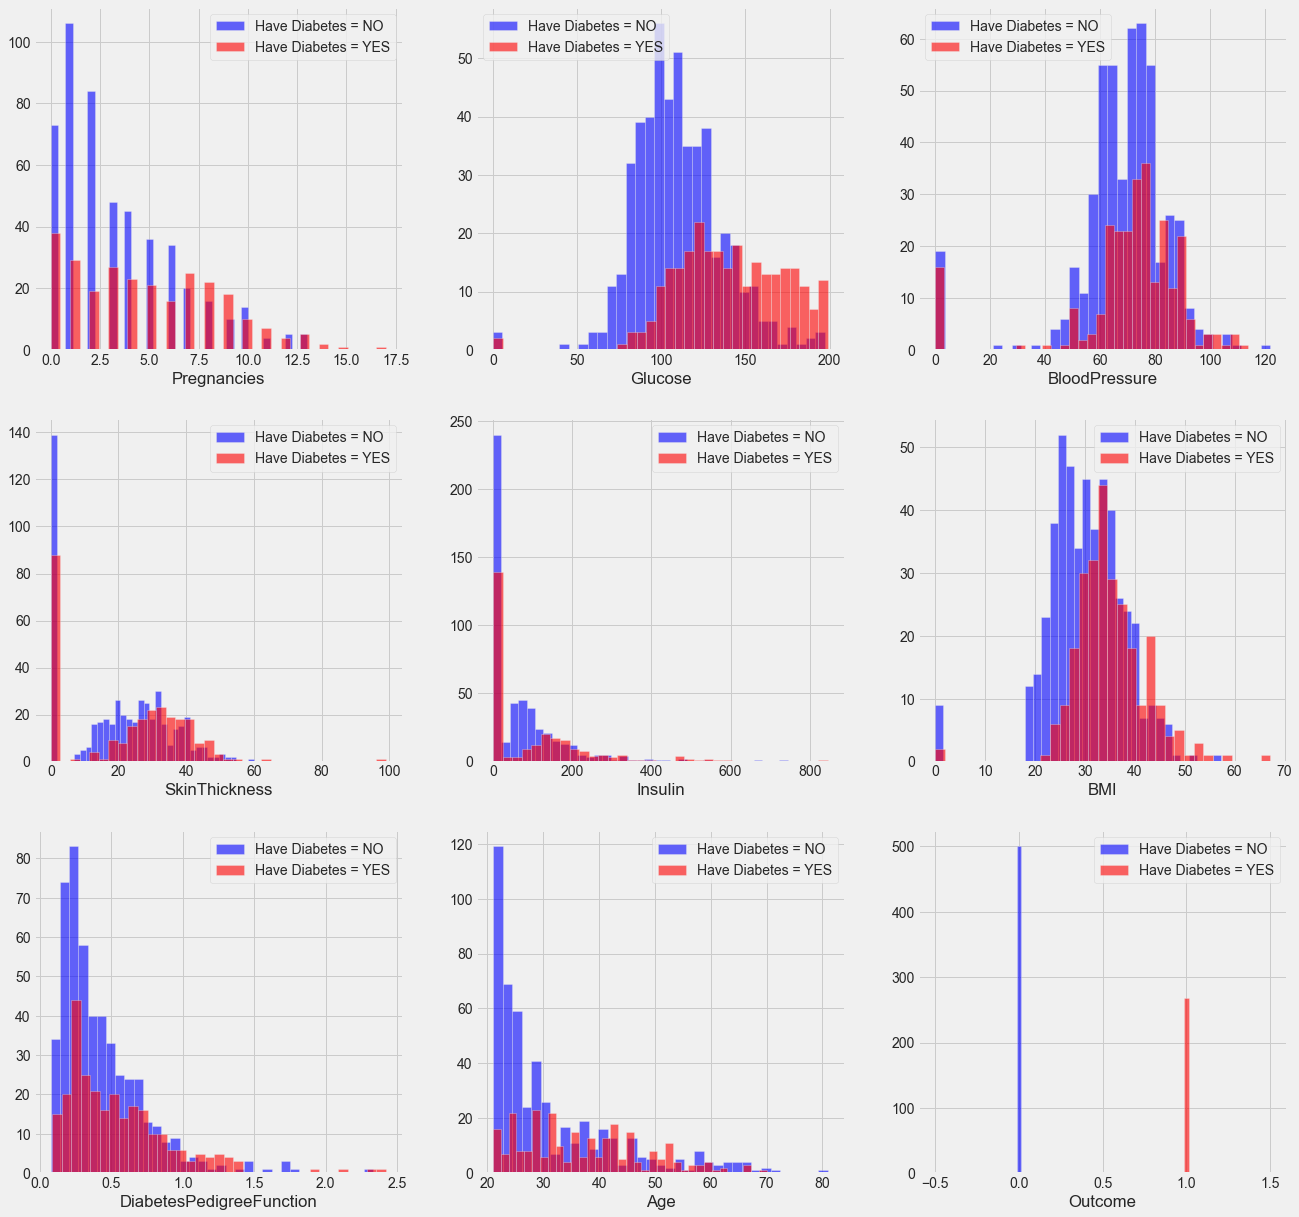

In [5]:
# Visualizing the distribution of the data for every feature
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[df["Outcome"] == 0][column].hist(
        bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    df[df["Outcome"] == 1][column].hist(
        bins=35, color='red', label='Have Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


In [6]:
# How many missing zeros are mising in each feature
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure',
                   'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")


Pregnancies ==> Missing zeros : 111
Glucose ==> Missing zeros : 5
BloodPressure ==> Missing zeros : 35
SkinThickness ==> Missing zeros : 227
Insulin ==> Missing zeros : 374
BMI ==> Missing zeros : 11
DiabetesPedigreeFunction ==> Missing zeros : 0
Age ==> Missing zeros : 0


In [7]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])


In [8]:
from sklearn.model_selection import train_test_split
X = df[feature_columns]
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(
    base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)
y_test_pred = bagging_clf.predict(X_test)
y_train_pred = bagging_clf.predict(X_train)
tree = DecisionTreeClassifier()


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("=========BAGGED DECISION TREE======================")
print("TRAINING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
print()
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")


=========BAGGED DECISION TREE======================
TRAINING RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]

ACCURACY SCORE:
1.0000

TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]

ACCURACY SCORE:
0.7576


In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
y_test_pred = rf_clf.predict(X_test)
y_train_pred = rf_clf.predict(X_train)
print("================RANDOM FOREST======================")
print("TRAINING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
print()
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")


================RANDOM FOREST======================
TRAINING RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]

ACCURACY SCORE:
1.0000

TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]

ACCURACY SCORE:
0.7532


In [17]:
# BOOSTING
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
y_test_pred = ada_boost_clf.predict(X_test)
y_train_pred = ada_boost_clf.predict(X_train)
print("================ADABOOST NIKHIL CHAUHAN======================")
print("TRAINING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
print()
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")


================ADABOOST NIKHIL CHAUHAN======================
TRAINING RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]

ACCURACY SCORE:
0.8324

TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]

ACCURACY SCORE:
0.7619


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)

print("================GradientBoosting NIKHIL CHAUHAN======================")
print("TRAINING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
print()
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
print()
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")


================GradientBoosting NIKHIL CHAUHAN======================
TRAINING RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]

ACCURACY SCORE:
0.8324

TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]

ACCURACY SCORE:
0.7619
